<a href="https://colab.research.google.com/github/Vikashkrishna/AML_LAB/blob/main/2348571_PracticeEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
feature_columns = ['SepalLengthCm',	'SepalWidthCm','PetalLengthCm','PetalWidthCm']
x = df[feature_columns].values
y = df['Species'].values

In [7]:
from sklearn.preprocessing import LabelEncoder
a = LabelEncoder()
y = a.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

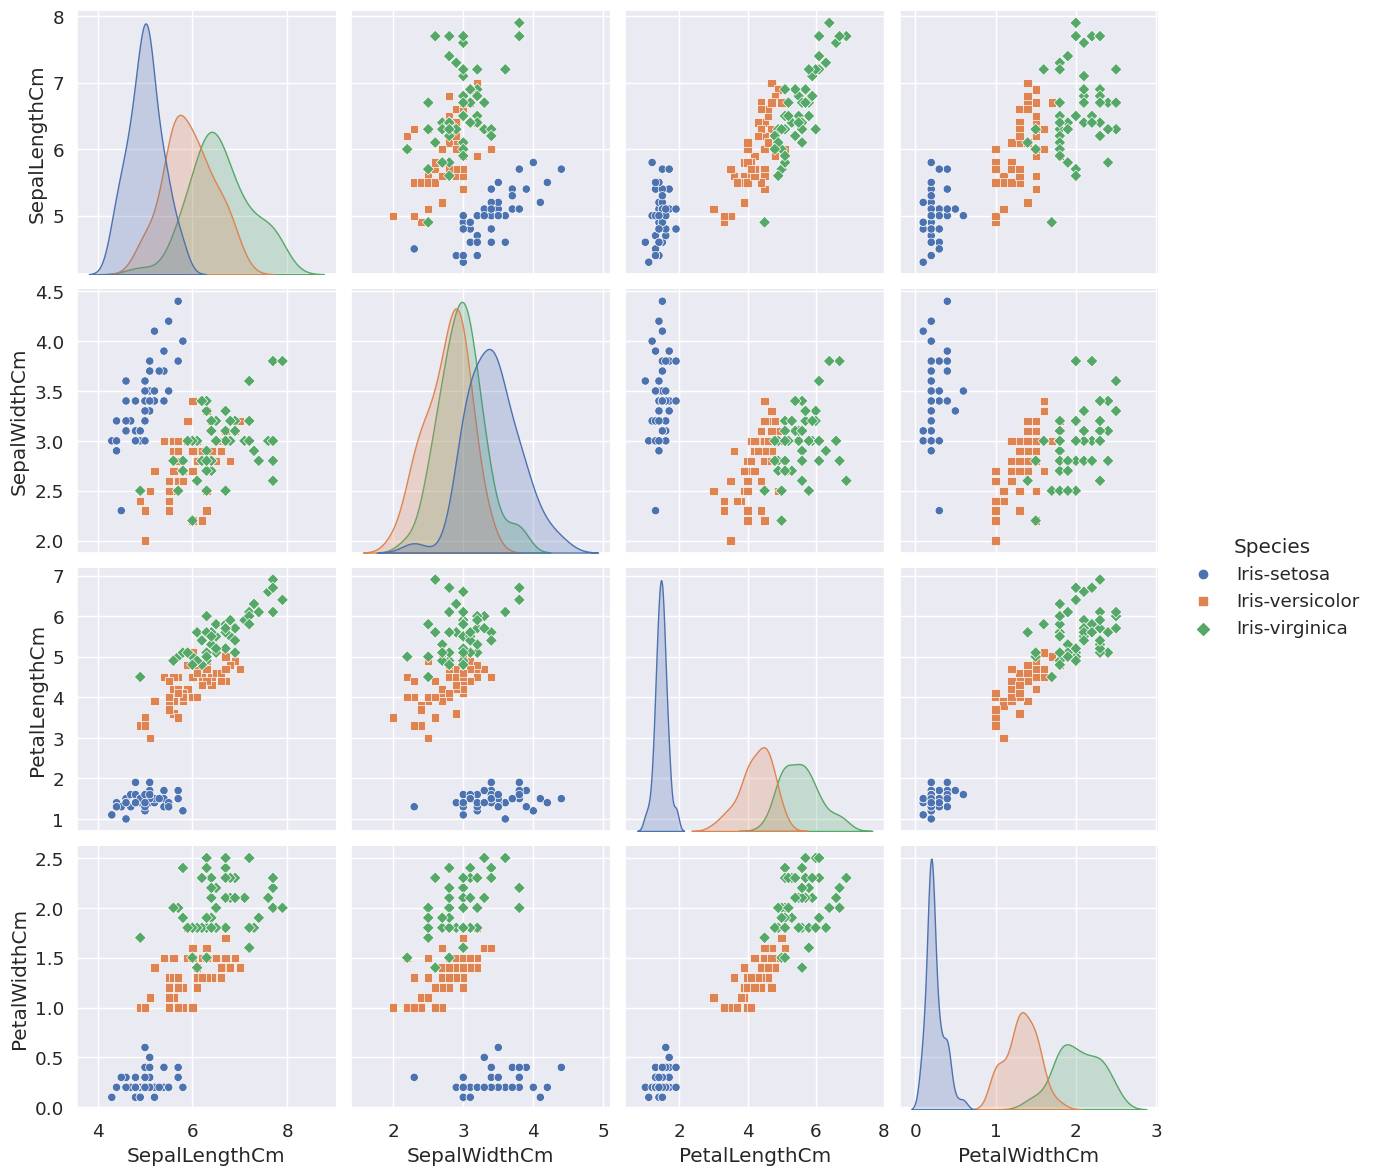

In [21]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)

In [13]:
c= confusion_matrix(y_pred , y_test)
c


array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]])

In [15]:
c_df = pd.DataFrame(c,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])


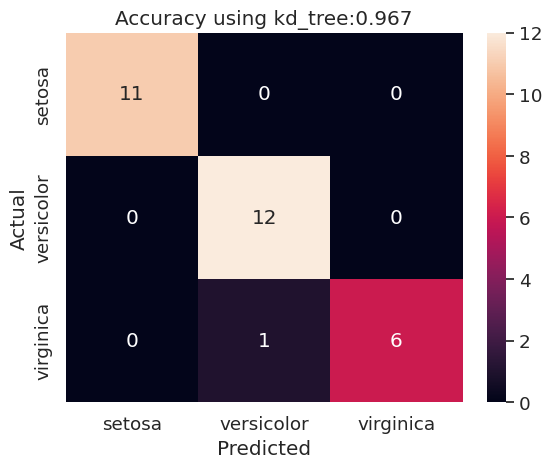

In [17]:
sns.heatmap(c_df, annot=True)
plt.title('Accuracy using kd_tree:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
accuracy = accuracy_score(y_test,y_pred)*100
print('accuracy : '+ str(round(accuracy,2))+'%')

accuracy : 96.67%
